# <center>Appliances Energy Prediction - Multivariate Data</center>

### Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

### Initialize Dataframe

In [2]:
df = pd.read_csv('energy_data.csv', index_col='date', infer_datetime_format=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

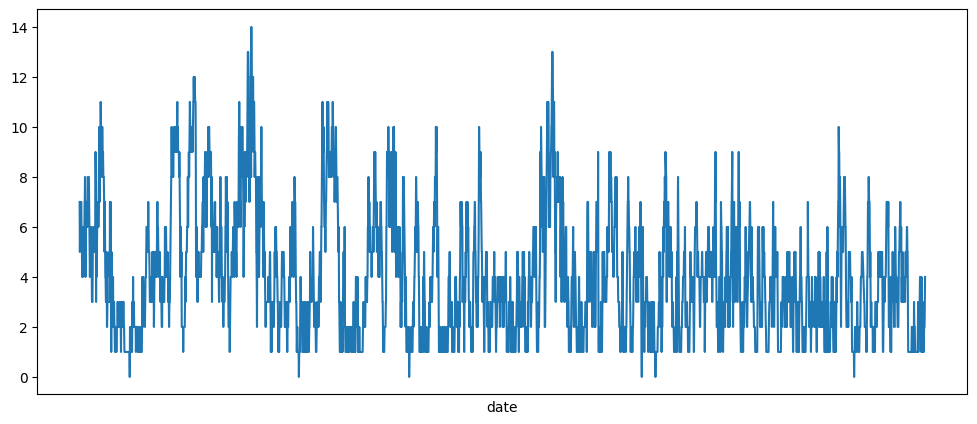

In [13]:
df['Windspeed'].plot(figsize=(12, 5))
plt.xticks([])
plt.show()

### Data Preprocessing

In [14]:
len(df)

19735

In [15]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [16]:
df.tail(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:40:00,270,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [19]:
df = df.loc['2016-05-01':].round(2)

In [20]:
len(df)

3853

In [21]:
24*60/10 # data collected every 10 mins

144.0

In [23]:
test_days = 2
test_ind = test_days*144

In [24]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [26]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [27]:
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [29]:
length = 144
generator = TimeseriesGenerator(scaler_train, scaler_train,
                               length=length, batch_size=1)

In [34]:
len(scaler_train), len(generator), scaler_train.shape[1]

(3565, 3421, 28)

### Training the model

In [36]:
model = Sequential()
model.add(LSTM(25, input_shape=(length, scaler_train.shape[1])))
model.add(Dense(scaler_train.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25)                5400      
                                                                 
 dense (Dense)               (None, 28)                728       
                                                                 
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
val_gen = TimeseriesGenerator(scaler_test, scaler_test,
                             length=length, batch_size=1)

In [40]:
model.fit(generator, epochs=5, validation_data=val_gen,
         callbacks=[early_stop])

Epoch 1/5
3421/3421 [==============================] - 192s 55ms/step - loss: 0.0158 - val_loss: 0.0141
Epoch 2/5
3421/3421 [==============================] - 183s 54ms/step - loss: 0.0095 - val_loss: 0.0111
Epoch 3/5
3421/3421 [==============================] - 185s 54ms/step - loss: 0.0083 - val_loss: 0.0100
Epoch 4/5
3421/3421 [==============================] - 183s 54ms/step - loss: 0.0078 - val_loss: 0.0088
Epoch 5/5
3421/3421 [==============================] - 189s 55ms/step - loss: 0.0075 - val_loss: 0.0091


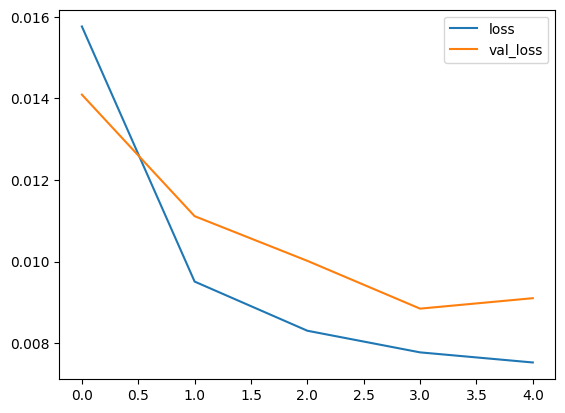

In [41]:
history = pd.DataFrame(model.history.history)
history.plot()
plt.show()

In [42]:
eval_batch = scaler_train[-length:]
eval_batch = eval_batch.reshape((1, length, scaler_train.shape[1]))

In [46]:
n_features = scaler_train.shape[1]
test_pred = []

eval_batch = scaler_train[-length:]
curr_batch = eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    curr_pred = model.predict(curr_batch, verbose=False)[0]
    test_pred.append(curr_pred)
    curr_batch = np.append(curr_batch[:, 1:, :], [[curr_pred]], axis=1)
    

In [52]:
true_pred = scaler.inverse_transform(test_pred)

In [53]:
true_pred = pd.DataFrame(data=true_pred, columns=test.columns)
true_pred

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,105.310881,-0.512059,24.622335,37.761779,24.202605,35.640006,25.284724,37.508759,23.998058,36.975145,...,21.962688,37.727699,17.109063,756.419453,57.309322,1.878121,39.516003,7.842629,23.727693,25.622972
1,99.838935,-1.098870,24.617690,37.825732,24.058432,35.771700,25.298263,37.830717,23.925643,36.932901,...,22.032441,37.838761,17.064743,756.354596,58.289380,1.810328,38.798605,8.112441,23.911436,25.148795
2,94.811522,-1.654468,24.600220,37.921032,23.910561,36.018020,25.339640,38.047556,23.885195,36.951731,...,22.067618,37.980777,16.973571,756.391684,59.367373,1.739901,38.184168,8.309831,24.018175,24.934015
3,90.217455,-2.157852,24.577972,38.003049,23.742058,36.310344,25.381626,38.195679,23.842710,36.964666,...,22.086274,38.131594,16.844949,756.456823,60.526370,1.651261,37.622710,8.488487,24.027143,24.744093
4,86.040178,-2.612117,24.556523,38.077102,23.562474,36.631692,25.422933,38.306499,23.798915,36.975538,...,22.097536,38.294789,16.691041,756.551979,61.794447,1.549107,37.110562,8.656856,24.007884,24.593623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-126.559951,-14.739340,23.640366,28.168995,17.459882,37.076167,21.745409,32.998186,23.350289,24.503156,...,20.795368,37.930574,-3.280491,745.298061,114.737061,0.652119,65.432158,4.194151,22.976348,20.415289
284,-126.566330,-14.739361,23.640415,28.168926,17.459770,37.076201,21.745372,32.998198,23.350398,24.503005,...,20.795288,37.930538,-3.280694,745.299265,114.737115,0.651871,65.430276,4.194078,22.976711,20.415148
285,-126.572618,-14.739385,23.640464,28.168860,17.459659,37.076229,21.745336,32.998211,23.350504,24.502855,...,20.795210,37.930503,-3.280891,745.300448,114.737133,0.651629,65.428410,4.194008,22.977068,20.415006
286,-126.578791,-14.739406,23.640511,28.168794,17.459550,37.076263,21.745300,32.998224,23.350608,24.502711,...,20.795133,37.930469,-3.281085,745.301609,114.737169,0.651391,65.426586,4.193941,22.977414,20.414863
